---
title: Get data from the Hamburg Urban Data Portal using WFS
subtitle: Learn how to access vector data from the Hamburg Urban Data Portal with WFS
authors:
  - name: Anne Fouilloux
    orcid: 0000-0002-1784-2920
    github: annefou
    affiliations:
      - id: Simula Research Laboratory
        institution: Simula Research Laboratory
        ror: 00vn06n10
date: 2025-05-14
keywords : flooding
---

![Hambburg Urban data platform logo](https://www.en.urbandataplatform.hamburg/resource/crblob/797502/9c2f2d2edc1149673134bf88ece1dda5/logo-udp-data.jpg)

(introduction)=
## Introduction

### The Hamburg Urban Data Platform
The [Hamburg Urban Data Platform (UDP_HH)](https://www.urbandataplatform.hamburg/) is a central component of the city's digital transformation strategy, serving as a comprehensive hub for collecting, integrating, and disseminating urban data. Developed by the State Office for Geoinformation and Surveying (LGV) in collaboration with the CityScienceLab at HafenCity University, the platform offers standardized interfaces and real-time access to a wide array of datasets, including traffic counts, environmental measurements, and infrastructure details. These datasets are accessible to public authorities, businesses, researchers, and citizens, facilitating data-driven decision-making and fostering innovation. The platform's user-friendly interface, known as the UDP Cockpit, allows users to explore and visualize data interactively, supporting various applications from urban planning to environmental monitoring. By promoting transparency and interoperability, the Urban Data Platform plays a pivotal role in enhancing Hamburg's status as a smart city. 

### Purpose of this Jupyter Notebook
This jupyter notebook shows how to access data from the Hamburg Urban Data portal using WFS. In this example, we get:

- Data from the Hamburg Urban Data Portal [Hochwasserschutzlinie im Land Bremen](https://www.metaver.de:443/trefferanzeige?docuuid=0EAD7F6B-5A72-4906-B686-6B674BAB27E5&rstart=20&currentSelectorPage=1&f=type:opendata;&lang=de) into a geopandas data frame
- Save the data into geosjon with **epsg:4326** projection for further usage for instance in JupyterGIS.

(overview)=
:::{hint} Overview
**Questions**
- How can we access flood-related geospatial data from the Hamburg Urban Data Portal?
- What is the role of WFS (Web Feature Service) in retrieving data for flood risk analysis?
- How can we convert this data into a format suitable for further geospatial analysis (e.g., GeoJSON with EPSG:4326)?

**Objectives**
- Retrieve geospatial flood protection data (e.g., flood protection lines) from the Hamburg Urban Data Portal using WFS.
- Convert and save the data in a standardized coordinate reference system (EPSG:4326) for use in tools like JupyterGIS or QGIS.
:::

(requirements)=
## Requirements
Start installing and importing the necessary libraries
### Install Python Packages

In [20]:
pip install jupyterlab_myst geopandas geojson matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 20.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


(setup)=
### Import Python Packages

In [15]:
import requests
import geopandas as gpd
from io import BytesIO  # Import BytesIO

(parameters)=
## Input data required
### Set input parameters for WFS request

In [16]:
# WFS URL
wfs_url: str = "https://geoportal.saarland.de/arcgis/services/Internet/Hochwasser_WFS/MapServer/WFSServer?&request=GetCapabilities&VERSION=1.1.0&SERVICE=WFS"

# Feature type
feature_typename: str = "Hochwasser_WFS:Flaeche100_generalisiert"

# Output file name (Geojson)
filename: str = "HQ100_Flaeche100_generalisiert_4326.geojson"

(retrieve)=
## Get data from the Hamburg Urban Data Portal using WFS

In [17]:
# Specify parameters
params: dict = dict(
    service: str = "WFS",
    request: str = "GetFeature",
    typeName: str: = feature_typename,
)

try:
    # Fetch data
    r = requests.get(wfs_url, params=params)
    r.raise_for_status()  # Check for HTTP errors

    # Read GML directly into GeoDataFrame
    gml_data = BytesIO(r.content)
    data = gpd.read_file(gml_data, driver="GML")

except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")
except Exception as e:
    print(f"Failed to parse GML: {e}")

/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GML does not support open option DRIVER
  return ogr_read(


(figure)=
## Quick visualisation

<Axes: >

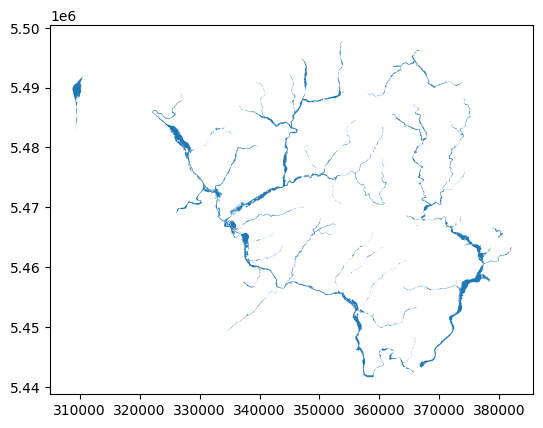

In [18]:
data.plot()

(outputs)=
## Save to geojson with WSG84 (epsg:4326) projection

In [19]:
if os.path.exists(filename):
    print("Skipped creation: file already exists.")
else:
    data.to_crs(4326).to_file(filename, encoding="utf-8")

Skipped creation: file already exists.
